CALCULUS

1D derivative

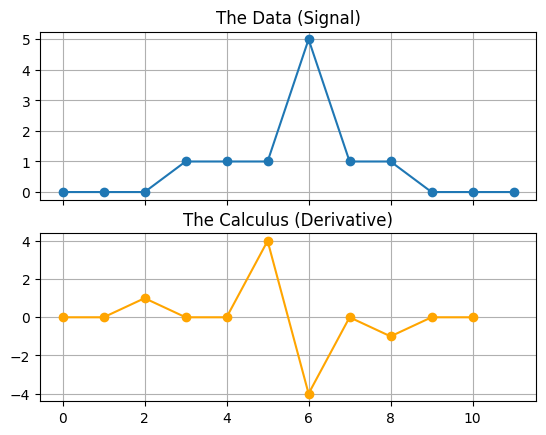

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create a "digital signal" (e.g., noisy ECG like data)
# a flat line with a sudden "event" (step up) and then a "spike"
signal = np.array([0,0,0,1,1,1,5,1,1,0,0,0])

# the calculus : compute the discrete derivatives
# this calculates signal[i+1] - signal[i]
derivative = np.diff(signal)

# visualize
fig, ax = plt.subplots(2,1, sharex=True)

ax[0].plot(signal, 'o-', label='Original Signal')
ax[0].set_title("The Data (Signal)")
ax[0].grid(True)

ax[1].plot(derivative, 'o-', color='orange', label='Derivative (Rate of Change)')
ax[1].set_title("The Calculus (Derivative)")
ax[1].grid(True)

plt.show()


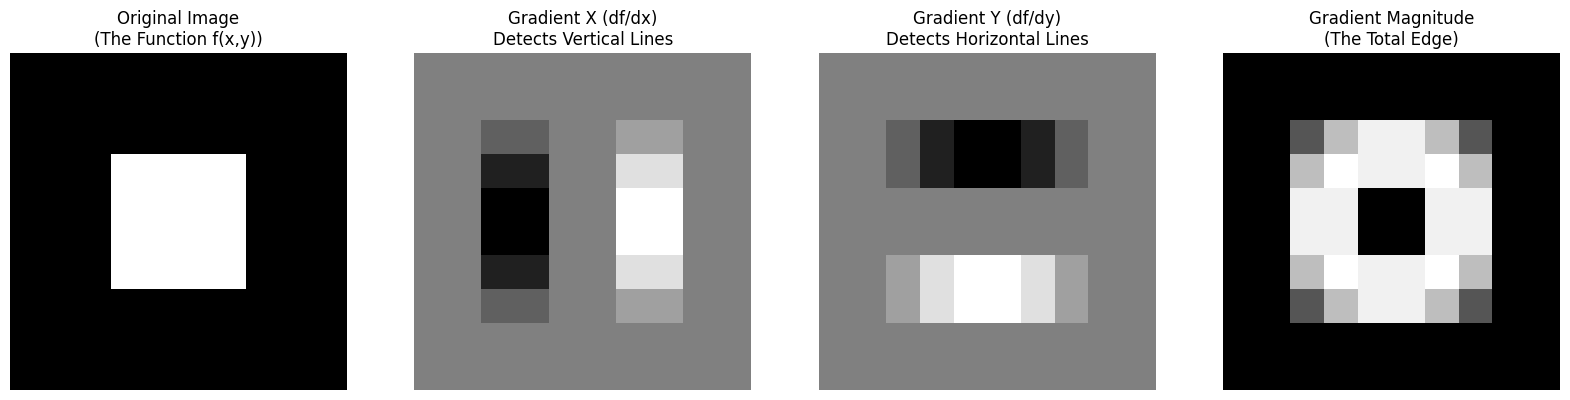

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# 1. Create a "Toy Image" (50x50 pixels)
# Background is dark (0), with a bright square (10) in the middle.
image = np.zeros((10, 10))
image[3:7, 3:7] = 10  # This is our "structure" or "tumor"

# 2. Define the "Calculus Kernels" (Sobel Filters)
# Kernel to find Vertical Edges (dx)
kernel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Kernel to find Horizontal Edges (dy)
kernel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# 3. Apply the Calculus (Convolution)
# This calculates the partial derivatives across the whole image
grad_x = convolve2d(image, kernel_x, mode='same')
grad_y = convolve2d(image, kernel_y, mode='same')

# 4. Compute Total Gradient Magnitude (Hypotenuse)
# Magnitude = sqrt(dx^2 + dy^2)
grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)

# 5. Visualization
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Original
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image\n(The Function f(x,y))")

# Gradient X (Vertical Edges)
ax[1].imshow(grad_x, cmap='gray')
ax[1].set_title("Gradient X (df/dx)\nDetects Vertical Lines")

# Gradient Y (Horizontal Edges)
ax[2].imshow(grad_y, cmap='gray')
ax[2].set_title("Gradient Y (df/dy)\nDetects Horizontal Lines")

# Magnitude (Combined)
ax[3].imshow(grad_magnitude, cmap='gray')
ax[3].set_title("Gradient Magnitude\n(The Total Edge)")

for a in ax: a.axis('off')
plt.show()

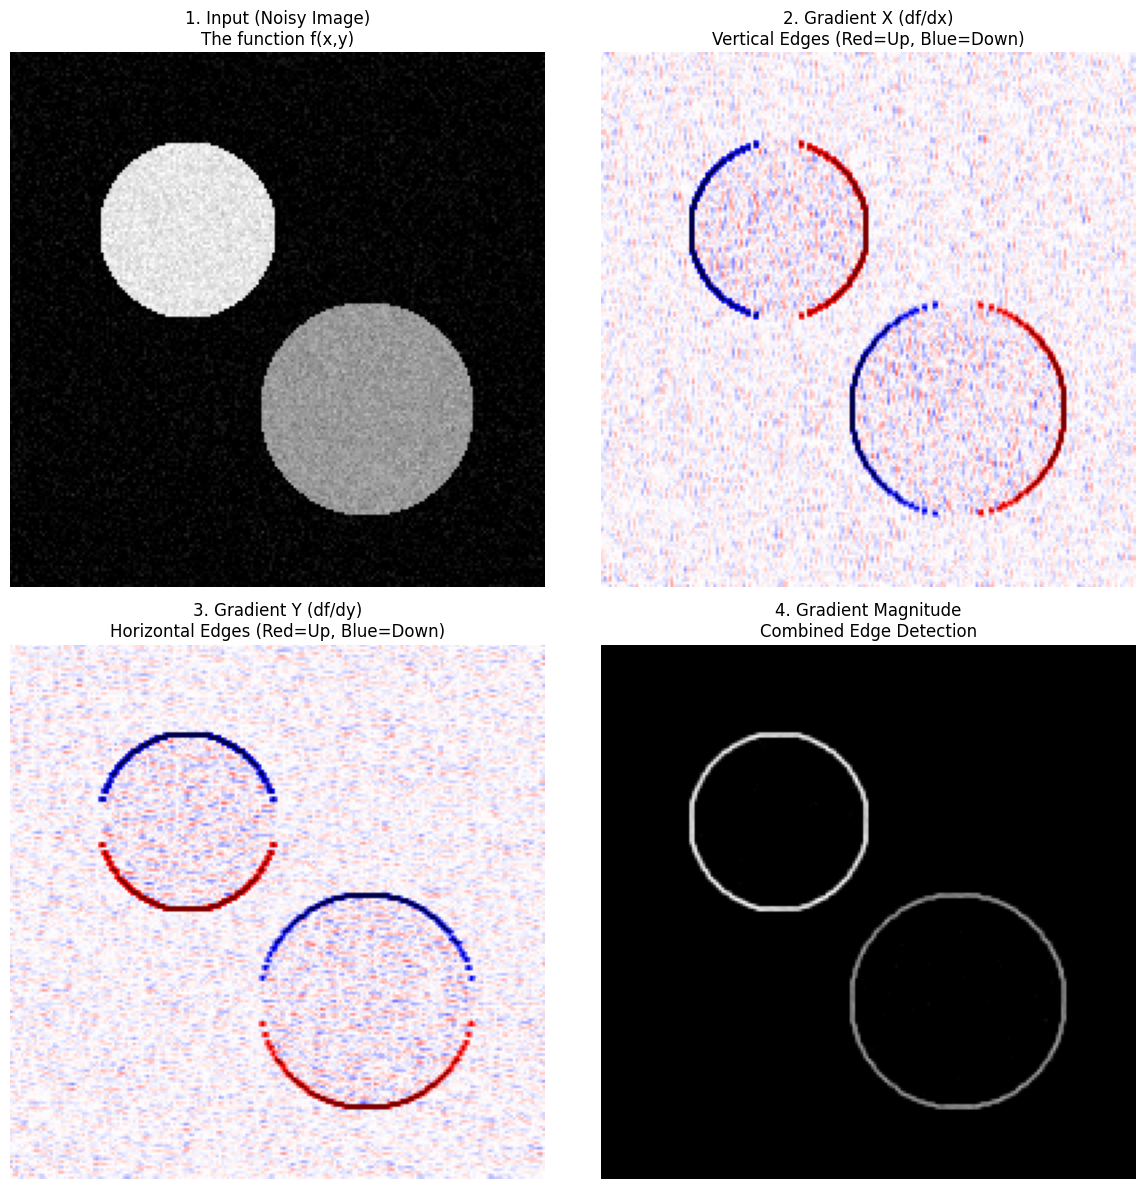

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# --- 1. Setup: Create a Synthetic "Real-world" 2D Image ---
# We will create a 200x200 image with two distinct "objects" and add noise.
N = 200
#image = plt.imread(r"C:\Users\vigne\Downloads\brain_ct_images_jpg format\CT_intracranial-hemorrhage-detection-and-segmentation-1.0.0\Patients_CT\129\brain\12.jpg")
image = np.zeros((N, N))

# Create coordinates
rr, cc = np.ogrid[:N, :N]

# Object 1: A bright circle in top-left
circle1_mask = (rr - N//3)**2 + (cc - N//3)**2 < (N//6)**2
image[circle1_mask] = 0.9

# Object 2: A medium-bright circle in bottom-right
circle2_mask = (rr - 2*N//3)**2 + (cc - 2*N//3)**2 < (N//5)**2
image[circle2_mask] = 0.6

# Add sensor noise to make it realistic (Calculus hates noise!)
noise = np.random.normal(0, 0.05, (N, N))
noisy_image = image + noise
# Clip values to stay between 0 and 1
noisy_image = np.clip(noisy_image, 0, 1)


# --- 2. The Calculus: Defining the Derivative Kernels (Sobel) ---
# Kernel for df/dx (detects changes along X-axis -> Vertical edges)
kernel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Kernel for df/dy (detects changes along Y-axis -> Horizontal edges)
kernel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])


# --- 3. Execution: Applying the Derivatives (Convolution) ---
# We apply the kernels to the noisy image.
# 'boundary=symm' handles the edges of the image gracefully.
grad_x = convolve2d(noisy_image, kernel_x, mode='same', boundary='symm')
grad_y = convolve2d(noisy_image, kernel_y, mode='same', boundary='symm')

# Compute the Total Gradient Magnitude (The overall "edginess")
# Magnitude = sqrt(dx^2 + dy^2)
grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)


# --- 4. Visualization ---
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Original Noisy Image
ax[0, 0].imshow(noisy_image, cmap='gray', vmin=0, vmax=1)
ax[0, 0].set_title("1. Input (Noisy Image)\nThe function f(x,y)")
ax[0, 0].axis('off')

# Gradient X (Vertical Edges)
# Note: We use a diverging colormap (seismic) so 0 is white,
# positive change is red, negative change is blue.
ax[0, 1].imshow(grad_x, cmap='seismic', vmin=-2, vmax=2)
ax[0, 1].set_title("2. Gradient X (df/dx)\nVertical Edges (Red=Up, Blue=Down)")
ax[0, 1].axis('off')

# Gradient Y (Horizontal Edges)
ax[1, 0].imshow(grad_y, cmap='seismic', vmin=-2, vmax=2)
ax[1, 0].set_title("3. Gradient Y (df/dy)\nHorizontal Edges (Red=Up, Blue=Down)")
ax[1, 0].axis('off')

# Total Magnitude
# Note: We lift the minimum value slightly to hide the background noise
ax[1, 1].imshow(grad_magnitude, cmap='gray', vmin=0.5)
ax[1, 1].set_title("4. Gradient Magnitude\nCombined Edge Detection")
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()

Image loaded successfully!


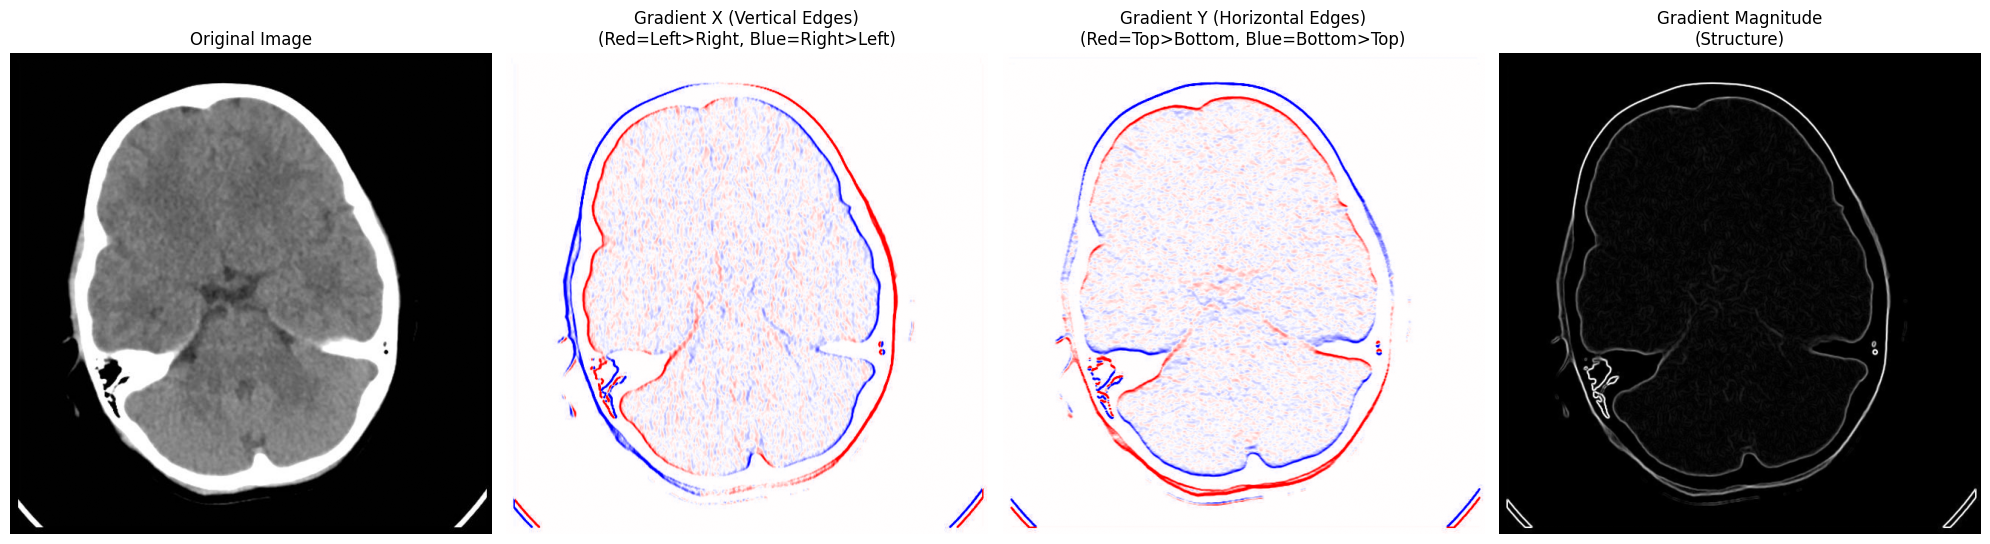

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # OpenCV for loading images
from scipy.signal import convolve2d

# --- 1. Load the Data (Your JPG) ---
# REPLACE 'your_image.jpg' with the actual path to an image on your PC.
# Ideally, pick an image with strong lines (like a building or an X-ray).
file_path = r"C:\Users\vigne\Downloads\brain_ct_images_jpg format\CT_intracranial-hemorrhage-detection-and-segmentation-1.0.0\Patients_CT\129\brain\12.jpg" 

# Load image in Grayscale mode (0 flag)
# This flattens the 3D (RGB) matrix into a 2D Matrix of intensities.
image = cv2.imread(file_path, 0)

# Check if image loaded successfully
if image is None:
    print(f"Error: Could not load image from {file_path}. Please check the path.")
    # Create a fallback dummy image just so the code runs for demonstration
    image = np.zeros((200, 200))
    image[50:150, 50:150] = 255
else:
    print("Image loaded successfully!")

# --- 2. Pre-processing (The "Applied Math" Step) ---
# Convert uint8 (0-255) to float (0.0-1.0).
# This prevents math errors when the derivative turns out negative.
image_float = image.astype(float) / 255.0

# --- 3. The Calculus Kernels (Sobel) ---
# Same kernels as before
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# --- 4. Compute Derivatives ---
grad_x = convolve2d(image_float, kernel_x, mode='same', boundary='symm')
grad_y = convolve2d(image_float, kernel_y, mode='same', boundary='symm')

# Compute Magnitude (Total Edge Strength)
grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)

# --- 5. Visualization ---
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

# Original
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

# Gradient X
# We use 'bwr' (Blue-White-Red) colormap.
# Blue = Negative Derivative (Darker to Brighter)
# Red = Positive Derivative (Brighter to Darker)
ax[1].imshow(grad_x, cmap='bwr', vmin=-1, vmax=1)
ax[1].set_title("Gradient X (Vertical Edges)\n(Red=Left>Right, Blue=Right>Left)")
ax[1].axis('off')

# Gradient Y
ax[2].imshow(grad_y, cmap='bwr', vmin=-1, vmax=1)
ax[2].set_title("Gradient Y (Horizontal Edges)\n(Red=Top>Bottom, Blue=Bottom>Top)")
ax[2].axis('off')

# Magnitude
# We amplify the result x2 to make faint edges visible
ax[3].imshow(grad_magnitude, cmap='gray', vmax=np.max(grad_magnitude)*0.8)
ax[3].set_title("Gradient Magnitude\n(Structure)")
ax[3].axis('off')

plt.tight_layout()
plt.show()

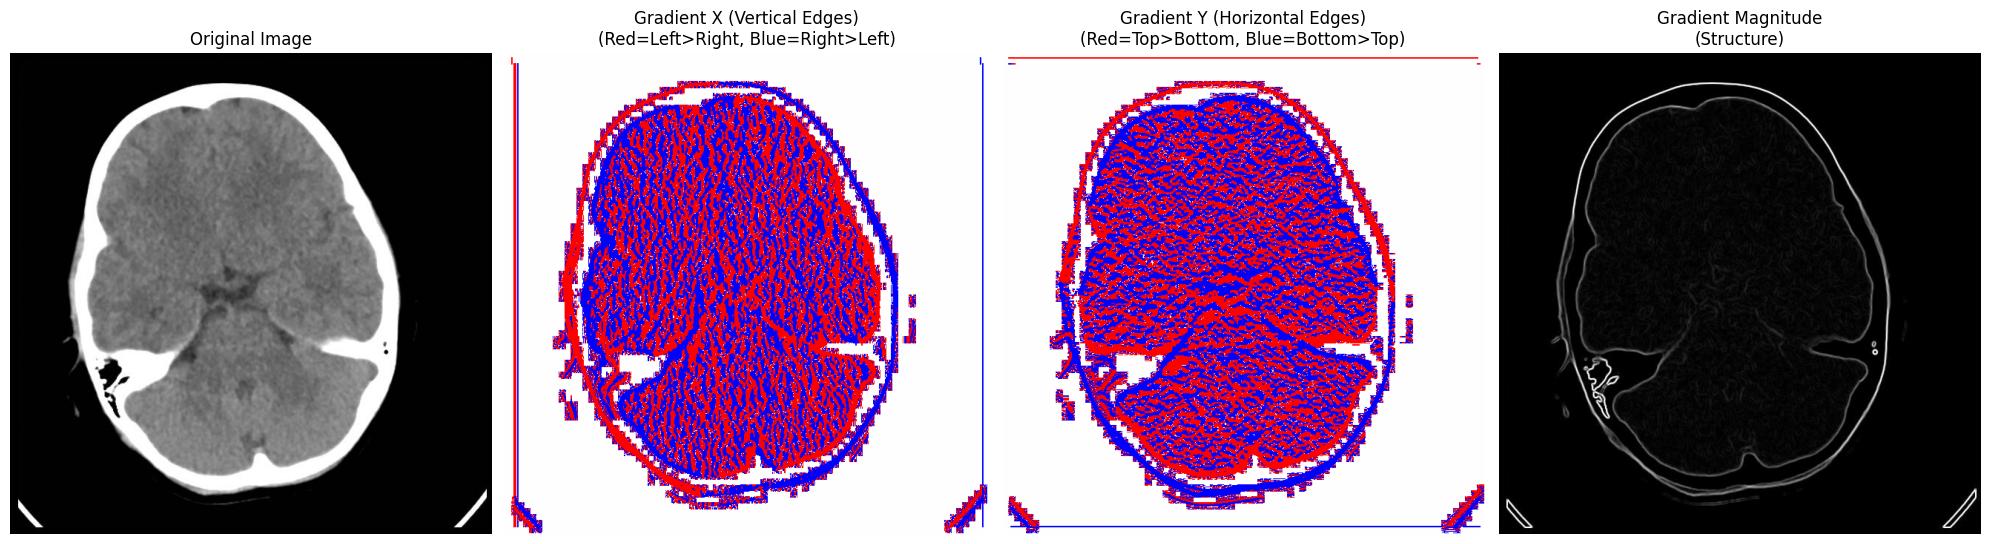

In [8]:
# The "Industry Standard" one-liner for Calculus on images:
grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# --- 5. Visualization ---
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

# Original
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

# Gradient X
# We use 'bwr' (Blue-White-Red) colormap.
# Blue = Negative Derivative (Darker to Brighter)
# Red = Positive Derivative (Brighter to Darker)
ax[1].imshow(grad_x, cmap='bwr', vmin=-1, vmax=1)
ax[1].set_title("Gradient X (Vertical Edges)\n(Red=Left>Right, Blue=Right>Left)")
ax[1].axis('off')

# Gradient Y
ax[2].imshow(grad_y, cmap='bwr', vmin=-1, vmax=1)
ax[2].set_title("Gradient Y (Horizontal Edges)\n(Red=Top>Bottom, Blue=Bottom>Top)")
ax[2].axis('off')

# Magnitude
# We amplify the result x2 to make faint edges visible
ax[3].imshow(grad_magnitude, cmap='gray', vmax=np.max(grad_magnitude)*0.8)
ax[3].set_title("Gradient Magnitude\n(Structure)")
ax[3].axis('off')

plt.tight_layout()
plt.show()

Model predicts class index: 861


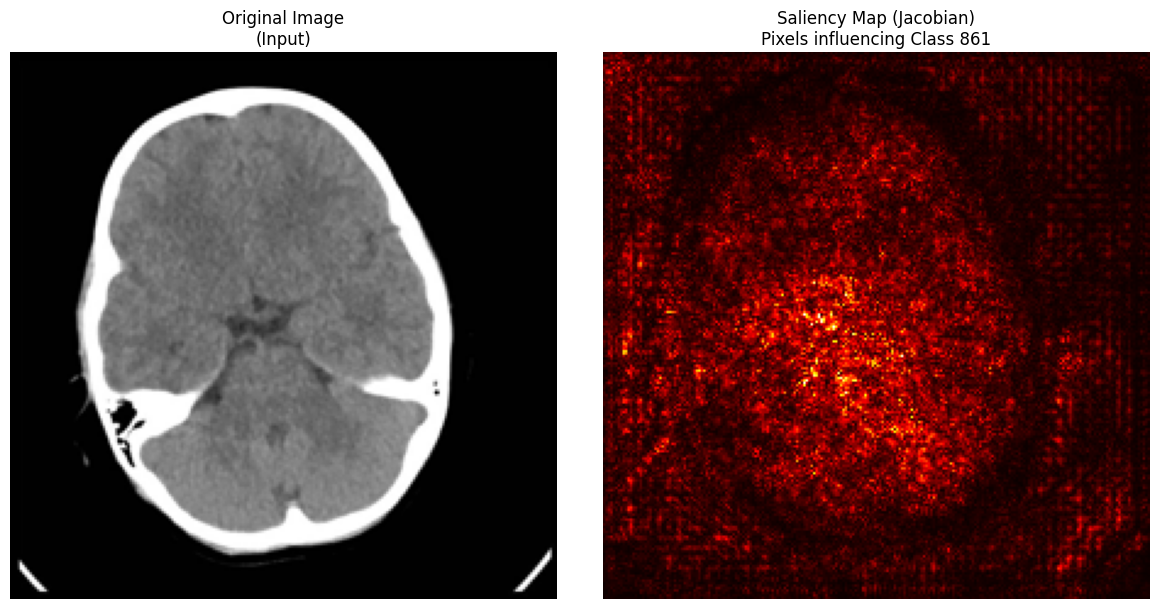

In [12]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Setup: Load a Pre-trained "Brain" ---
# We use ResNet18, a standard model trained on ImageNet.
# In a real medical scenario, you would load your own .pth weights here.
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model.eval()  # Set to evaluation mode (freeze dropout, batchnorm, etc.)

# --- 2. The Data: Load and Preprocess the Image ---
def preprocess_image(image_path):
    input_image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        # Standard normalization for ResNet
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # Create a mini-batch of 1
    return input_batch, input_image

# REPLACE with your image path (e.g., a dog, a cat, or an X-ray)
#image_path = 'your_image.jpg' 
image_path = r"C:\Users\vigne\Downloads\brain_ct_images_jpg format\CT_intracranial-hemorrhage-detection-and-segmentation-1.0.0\Patients_CT\129\brain\12.jpg"

# Safety check for the path
try:
    input_batch, original_image = preprocess_image(image_path)
except:
    print("Please provide a valid image path to run the code.")
    # Stop execution if no image found (for safety in this snippet)
    input_batch = torch.randn(1, 3, 224, 224) 

# --- 3. THE CALCULUS TRICK: Enable Gradient Tracking on the INPUT ---
# This is the most important line. 
# Usually, PyTorch only tracks gradients for Weights. 
# We force it to track gradients for the Input Pixels.
input_batch.requires_grad_()

# --- 4. Forward Pass ---
output = model(input_batch)

# Find the class with the highest score (what the model thinks it is)
score, predicted_class_idx = torch.max(output, 1)

print(f"Model predicts class index: {predicted_class_idx.item()}")

# --- 5. Backward Pass (The Saliency) ---
# We backpropagate from the winning score all the way back to the image.
score.backward()

# --- 6. Extract the Gradient ---
# input_batch.grad contains the derivatives (dScore/dPixel)
# shape is (1, 3, 224, 224) -> (Batch, Channels, Height, Width)
gradients = input_batch.grad[0] 

# Process the gradients to make them viewable
# A. Take the maximum magnitude across RGB channels (collapse 3D to 2D)
saliency, _ = torch.max(gradients.abs(), dim=0)

# B. Normalize to 0-1 for plotting
saliency = (saliency - saliency.min()) / (saliency.max() - saliency.min())

# --- 7. Visualization ---
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original Image
ax[0].imshow(original_image.resize((224, 224)))
ax[0].set_title("Original Image\n(Input)")
ax[0].axis('off')

# Saliency Map (The Derivative)
# We use 'hot' colormap: Black=No influence, Red/White=High influence
ax[1].imshow(saliency.detach().numpy(), cmap='hot')
ax[1].set_title(f"Saliency Map (Jacobian)\nPixels influencing Class {predicted_class_idx.item()}")
ax[1].axis('off')

plt.tight_layout()
plt.show()

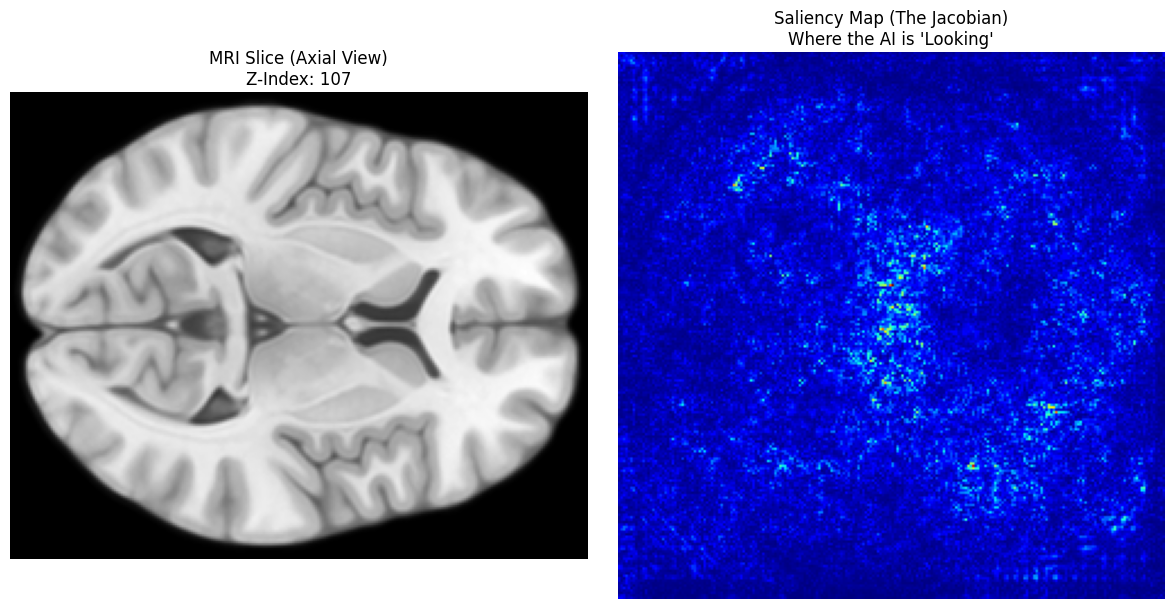

In [13]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# --- 1. Load the Medical Data (.nii) ---
# Replace with your actual .nii file path
nii_path = r'C:\Users\vigne\Downloads\day5_nii file\mni152.nii' 

try:
    # Load the 3D volume
    nii_img = nib.load(nii_path)
    nii_data = nii_img.get_fdata()
    
    # Extract the Middle Slice (Axial view)
    # We take the slice at the center of the Z-axis
    z_center = nii_data.shape[2] // 2
    slice_2d = nii_data[:, :, z_center]
    
    # --- 2. Pre-processing (The "Medical" to "AI" Bridge) ---
    # A. Normalize to 0-255 (Neural Networks hate raw MRI intensity values like 2000+)
    slice_2d = (slice_2d - np.min(slice_2d)) / (np.max(slice_2d) - np.min(slice_2d))
    slice_2d = (slice_2d * 255).astype(np.uint8)
    
    # B. Convert to PIL Image for PyTorch
    # This creates a Grayscale image (1 channel)
    pil_image = Image.fromarray(slice_2d)
    
    # C. Transform to Tensor and "Fake" 3 Channels
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.Grayscale(num_output_channels=3), # <--- THE TRICK: Repeats the slice 3 times
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    
    input_tensor = preprocess(pil_image)
    input_batch = input_tensor.unsqueeze(0) # Add batch dimension
    
except FileNotFoundError:
    print("No .nii file found. Creating a DUMMY MRI slice for demonstration.")
    # Create a synthetic "Brain" with a "Tumor"
    dummy_slice = np.zeros((224, 224))
    # Draw "Skull"
    rr, cc = np.ogrid[:224, :224]
    mask = (rr - 112)**2 + (cc - 112)**2 < 80**2
    dummy_slice[mask] = 100
    # Draw "Tumor" (Bright Spot)
    tumor_mask = (rr - 90)**2 + (cc - 130)**2 < 10**2
    dummy_slice[tumor_mask] = 255
    
    pil_image = Image.fromarray(dummy_slice.astype(np.uint8))
    # Apply same transforms as above
    preprocess = transforms.Compose([
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_batch = preprocess(pil_image).unsqueeze(0)
    original_slice = dummy_slice # Just for visualization later

# --- 3. The Calculus: Enable Gradient Tracking ---
input_batch.requires_grad_()

# --- 4. The Model (Pre-trained ResNet) ---
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model.eval()

# --- 5. Forward & Backward Pass ---
output = model(input_batch)
score, predicted_class = torch.max(output, 1)

# Backpropagate the "Winning Score" to finding the pixels responsible
score.backward()

# --- 6. Extract Saliency (Gradients) ---
# Get derivatives (dScore/dPixel)
gradients = input_batch.grad[0]

# Take max across the 3 fake channels to get a single 2D heat map
saliency, _ = torch.max(gradients.abs(), dim=0)

# Normalize for visualization
saliency = (saliency - saliency.min()) / (saliency.max() - saliency.min())

# --- 7. Visualization ---
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Show the MRI Slice
if 'slice_2d' in locals():
    ax[0].imshow(slice_2d, cmap='gray')
else:
    ax[0].imshow(pil_image, cmap='gray') # Fallback for dummy
ax[0].set_title(f"MRI Slice (Axial View)\nZ-Index: {z_center if 'z_center' in locals() else 'N/A'}")
ax[0].axis('off')

# Show the Saliency Map
# Use 'jet' or 'hot' heatmap.
# Bright areas = High Derivative = High importance to the model.
ax[1].imshow(saliency.detach().numpy(), cmap='jet')
ax[1].set_title("Saliency Map (The Jacobian)\nWhere the AI is 'Looking'")
ax[1].axis('off')

plt.tight_layout()
plt.show()